# Clustering

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 5/HW/diğer HW/PBL5recommendationdata.csv', encoding="ISO-8859-1", low_memory=False)

In [190]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN


## RFM Table

In [191]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [192]:
missing_cols = df.isna().mean(axis=0) # sutunlardaki nan eleman yuzdesi

In [193]:
df = df[df['Orders.subtotal']>0] # harcama yapmayan dahil edilmiyor

In [194]:
df = df[df['Order_Items.qty']>0] # alinan item sayisi

In [195]:
import datetime
import datetime as dt
df['Customers.last_modified']=df['Customers.last_modified'].apply(lambda d:datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))
df['Customers.last_modified']

0       1970-01-17 15:22:44
1       1970-01-17 15:22:44
2       1970-01-17 15:22:44
3       1970-01-17 15:22:42
4       1970-01-17 15:22:44
               ...         
4189    1970-01-17 22:30:08
4190    1970-01-17 22:30:12
4191    1970-01-17 22:30:13
4192    1970-01-17 22:30:16
4193    1970-01-17 22:30:18
Name: Customers.last_modified, Length: 4194, dtype: object

In [196]:
df_x = df.groupby('Customers.id').agg({'Orders.subtotal': lambda x: x.sum(),
                                      'Customers.last_modified': lambda x: x.max()})
df_x

,Orders.subtotal,Customers.last_modified
Customers.id,,
3,88.78,1970-01-17 15:22:44
4,19.56,1970-01-17 15:22:42
5,95.14,1970-01-17 15:22:44
7,39.19,1970-01-17 15:22:43
8,59.75,1970-01-17 15:22:43
...,...,...
3730,14.85,1970-01-17 22:30:08
3732,39.99,1970-01-17 22:30:12
3733,1099.00,1970-01-17 22:30:13


In [197]:
df_y = df.groupby(['Customers.id','Order_Items.product_id']).agg({'Orders.subtotal': lambda x: x.sum()})
df_y

Orders.subtotal
Customers.id Order_Items.product_id                 
3            1.0                               68.78
             177.0                             20.00
4            983.0                             19.56
5            310.0                             44.46
             799.0                             14.63
...                                              ...
3730         1842.0                            14.85
3732         782.0                             39.99
3733         2707.0                          1099.00
3735         993.0                            129.99
3736         562.0                             24.54

[3695 rows x 1 columns]

In [198]:
df_z = df_y.groupby('Customers.id').agg({'Orders.subtotal': lambda x: len(x)})
df_z

,Orders.subtotal
Customers.id,
3,2
4,1
5,3
7,1
8,1
...,...
3730,1
3732,1
3733,1


In [199]:
rfm_table = pd.merge(df_x, df_z, on='Customers.id')
rfm_table

,Orders.subtotal_x,Customers.last_modified,Orders.subtotal_y
Customers.id,,,
3,88.78,1970-01-17 15:22:44,2
4,19.56,1970-01-17 15:22:42,1
5,95.14,1970-01-17 15:22:44,3
7,39.19,1970-01-17 15:22:43,1
8,59.75,1970-01-17 15:22:43,1
...,...,...,...
3730,14.85,1970-01-17 22:30:08,1
3732,39.99,1970-01-17 22:30:12,1
3733,1099.00,1970-01-17 22:30:13,1


In [200]:
rfm_table.rename(columns={'Customers.last_modified': 'Recency',
                          'Orders.subtotal_y': 'Frequency',
                          'Orders.subtotal_x': 'Monetary'}, inplace=True)
rfm_table

,Monetary,Recency,Frequency
Customers.id,,,
3,88.78,1970-01-17 15:22:44,2
4,19.56,1970-01-17 15:22:42,1
5,95.14,1970-01-17 15:22:44,3
7,39.19,1970-01-17 15:22:43,1
8,59.75,1970-01-17 15:22:43,1
...,...,...,...
3730,14.85,1970-01-17 22:30:08,1
3732,39.99,1970-01-17 22:30:12,1
3733,1099.00,1970-01-17 22:30:13,1


In [201]:
rfm_table.describe()

,Monetary,Frequency
count,3026.000000,3026.000000
mean,182.173668,1.221084
std,629.309372,0.792338
min,2.890000,1.000000
25%,31.900000,1.000000
50%,64.990000,1.000000
75%,133.180000,1.000000
max,15041.560000,14.000000


## KMeans Clustering

In [202]:
x=rfm_table[['Monetary','Frequency']]

In [203]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1, clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        # model=model.fit(x)
        pred=model.fit_predict(x) # fit ve predict aynı anda yapıyormuş
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print("Number of cluster = {}, silhoutte = {}, inertia = {}".format(no_of_cluster, score, model.inertia_))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster = 2, silhoutte = 0.9628436996903627, inertia = 382774733.91106653
Number of cluster = 3, silhoutte = 0.9456410204750941, inertia = 199517286.43008792
Number of cluster = 4, silhoutte = 0.8775287387491917, inertia = 118764810.1358517
Number of cluster = 5, silhoutte = 0.8774781139836496, inertia = 84043949.77241388
Number of cluster = 6, silhoutte = 0.846824570180518, inertia = 52659959.53926998
Number of cluster = 7, silhoutte = 0.8029424418291031, inertia = 37053989.594518155
Number of cluster = 8, silhoutte = 0.7085107064511618, inertia = 25692580.822590023
Number of cluster = 9, silhoutte = 0.6432322365293983, inertia = 20730781.789680693
Number of cluster = 10, silhoutte = 0.6609564168088256, inertia = 16058644.76590183


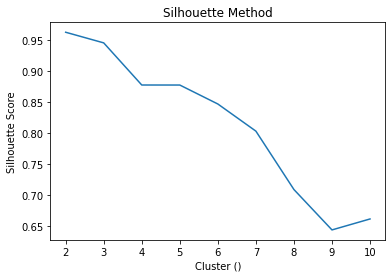

In [204]:
# Plotting the silhouette method
plt.plot(allclusters,allscore) # demek ki python da fonksiyonlar global etkiye sahip
plt.xlabel("Cluster ()")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

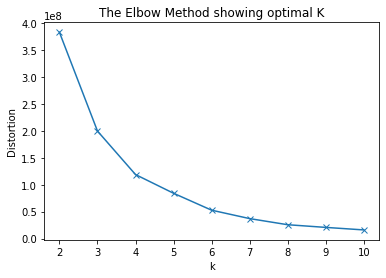

In [205]:
plt.plot(allclusters, sum_of_squared_distances, marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show() 

In [207]:
model=KMeans(n_clusters=4)
pred = model.fit_predict(x)

In [208]:
x['Cluster'] = pred
x

,Monetary,Frequency,Cluster
Customers.id,,,
3,88.78,2,0
4,19.56,1,0
5,95.14,3,0
7,39.19,1,0
8,59.75,1,0
...,...,...,...
3730,14.85,1,0
3732,39.99,1,0
3733,1099.00,1,3


In [212]:
x.Frequency.values

array([2, 1, 3, ..., 1, 1, 1])

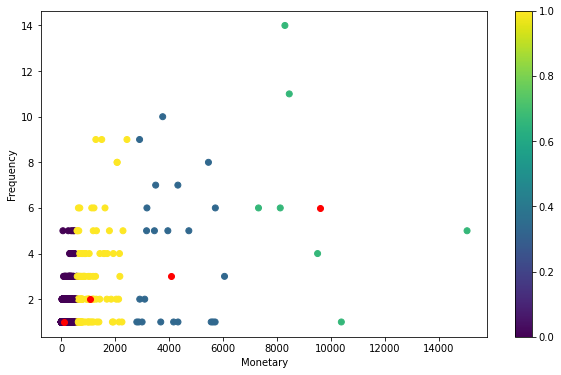

In [215]:
plt.figure(figsize=(10,6))
plt.scatter(x.Monetary.values, x.Frequency.values, c=pred)
plt.scatter(model.cluster_centers_.astype("int")[:, 0], model.cluster_centers_.astype("int")[:, 1], c='r') # centers
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()
# x ekseni mil, y ekseni fiyat 